In [1]:
import numpy as np
import pandas as pd
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
breast_cancer = load_breast_cancer()
print (breast_cancer.feature_names)
print (breast_cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [4]:
X = breast_cancer.data
y = breast_cancer.target

df = pd.DataFrame(X, columns=breast_cancer.feature_names)

# Add the target variable to the dataframe
df['target'] = y

# Print the first 5 rows of the dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

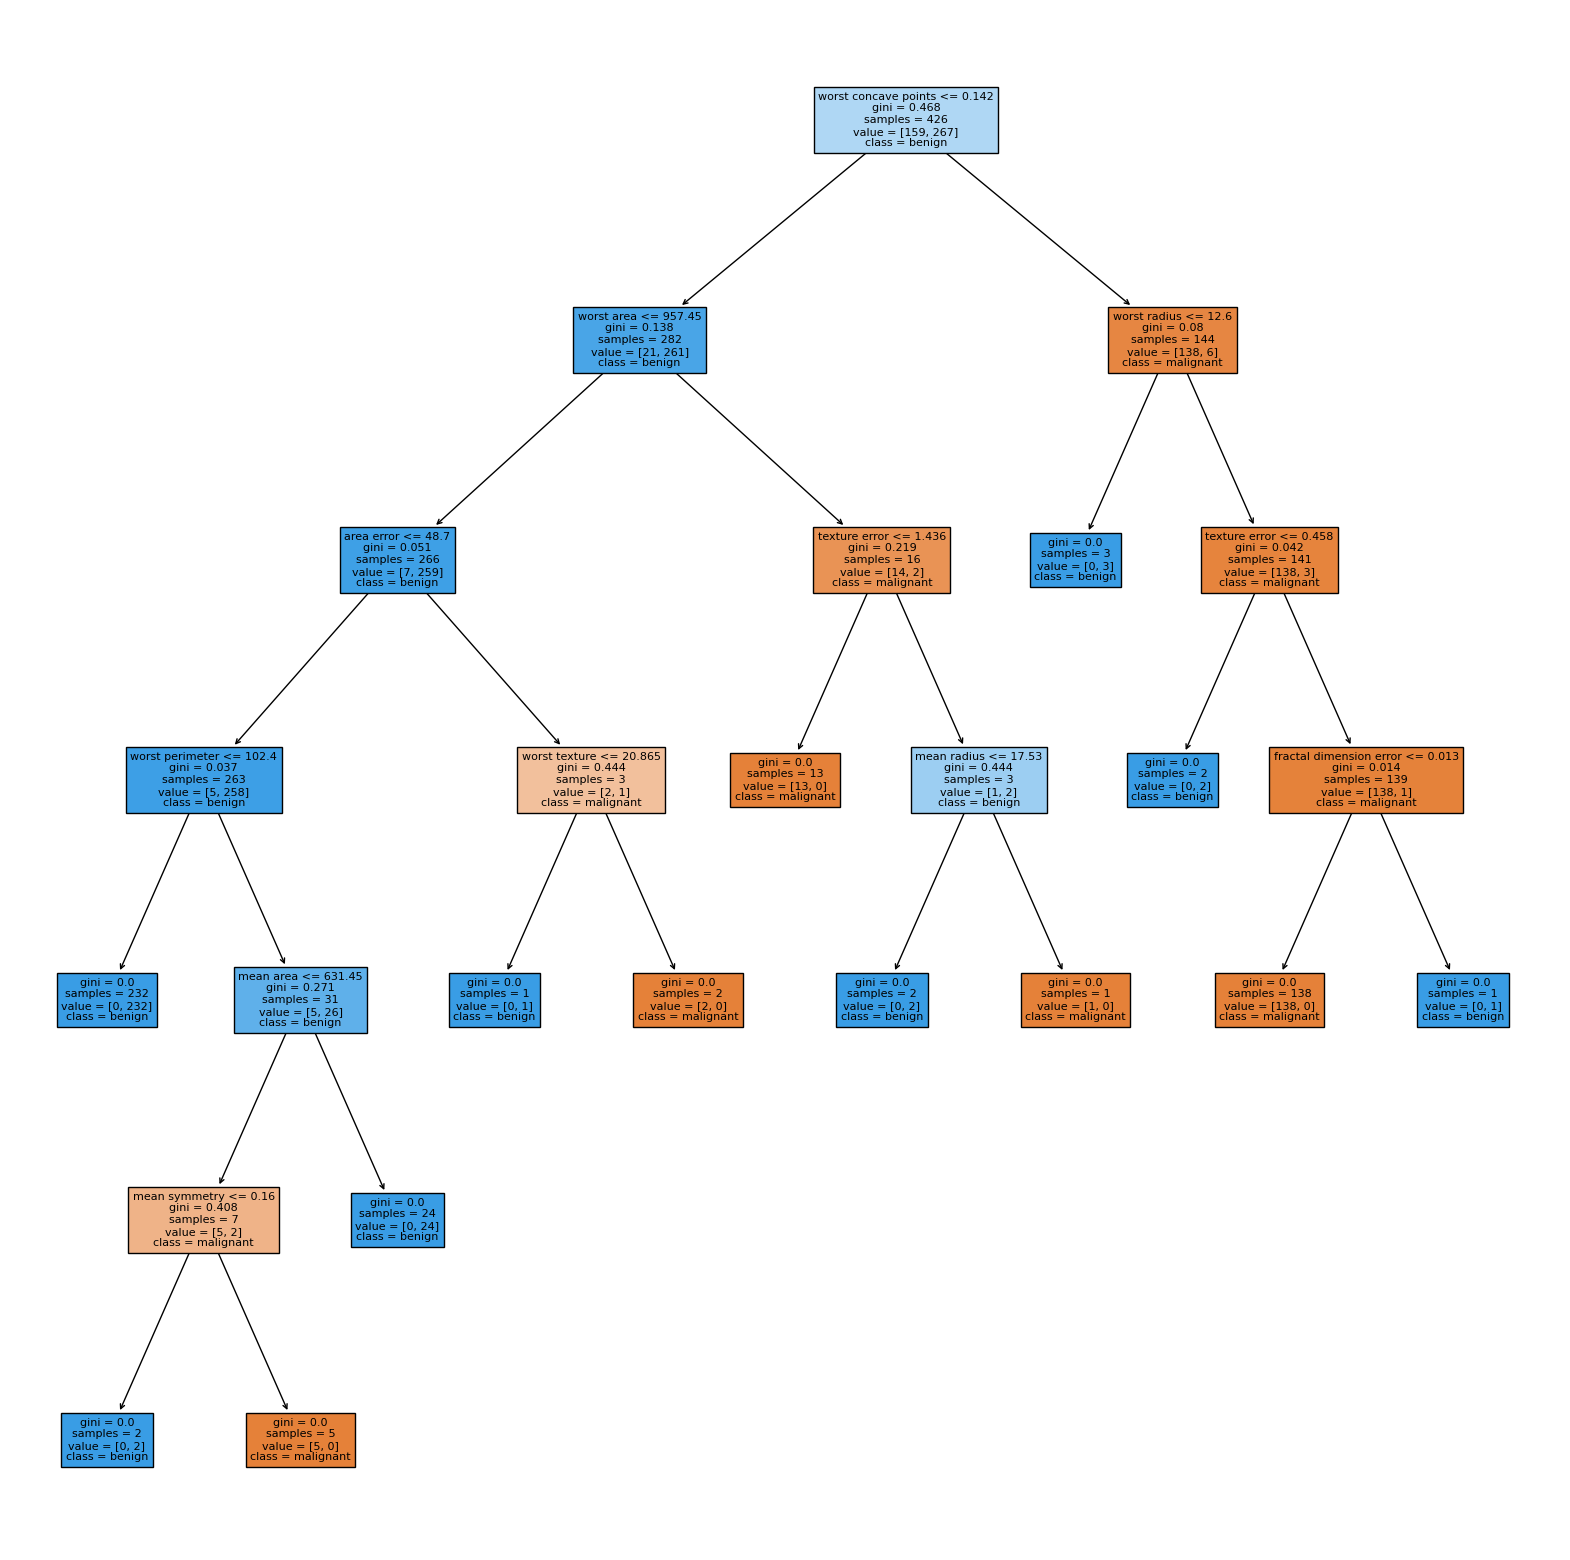

In [10]:
from sklearn import tree

plt.figure(figsize=(20,20))
features = df.columns
classes = breast_cancer.target_names
tree.plot_tree(model,feature_names=features.to_list(),
               class_names=list(classes),filled=True)
plt.show()

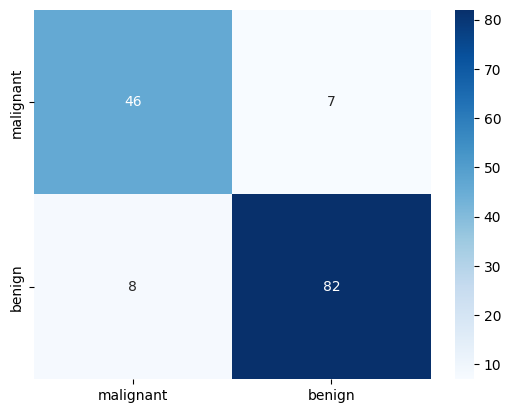

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred, labels=[0,1])
sns.heatmap(cm,annot=True,yticklabels=classes, xticklabels=classes, cmap='Blues', fmt='g')
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
#disp.plot()
plt.show()

$$

P(\hat{y} = 1 | y=1) True Positive \\
P(\hat{y} = 0 | y=1) False Positive \\
P(\hat{y} = 0 | y=0) True Negative \\
P(\hat{y} = 1 | y=0) False Negative
$$


In [12]:
from sklearn.metrics import accuracy_score
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Test score 0.8951048951048951


### Constraining with prepruning hyperparameters

In [13]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

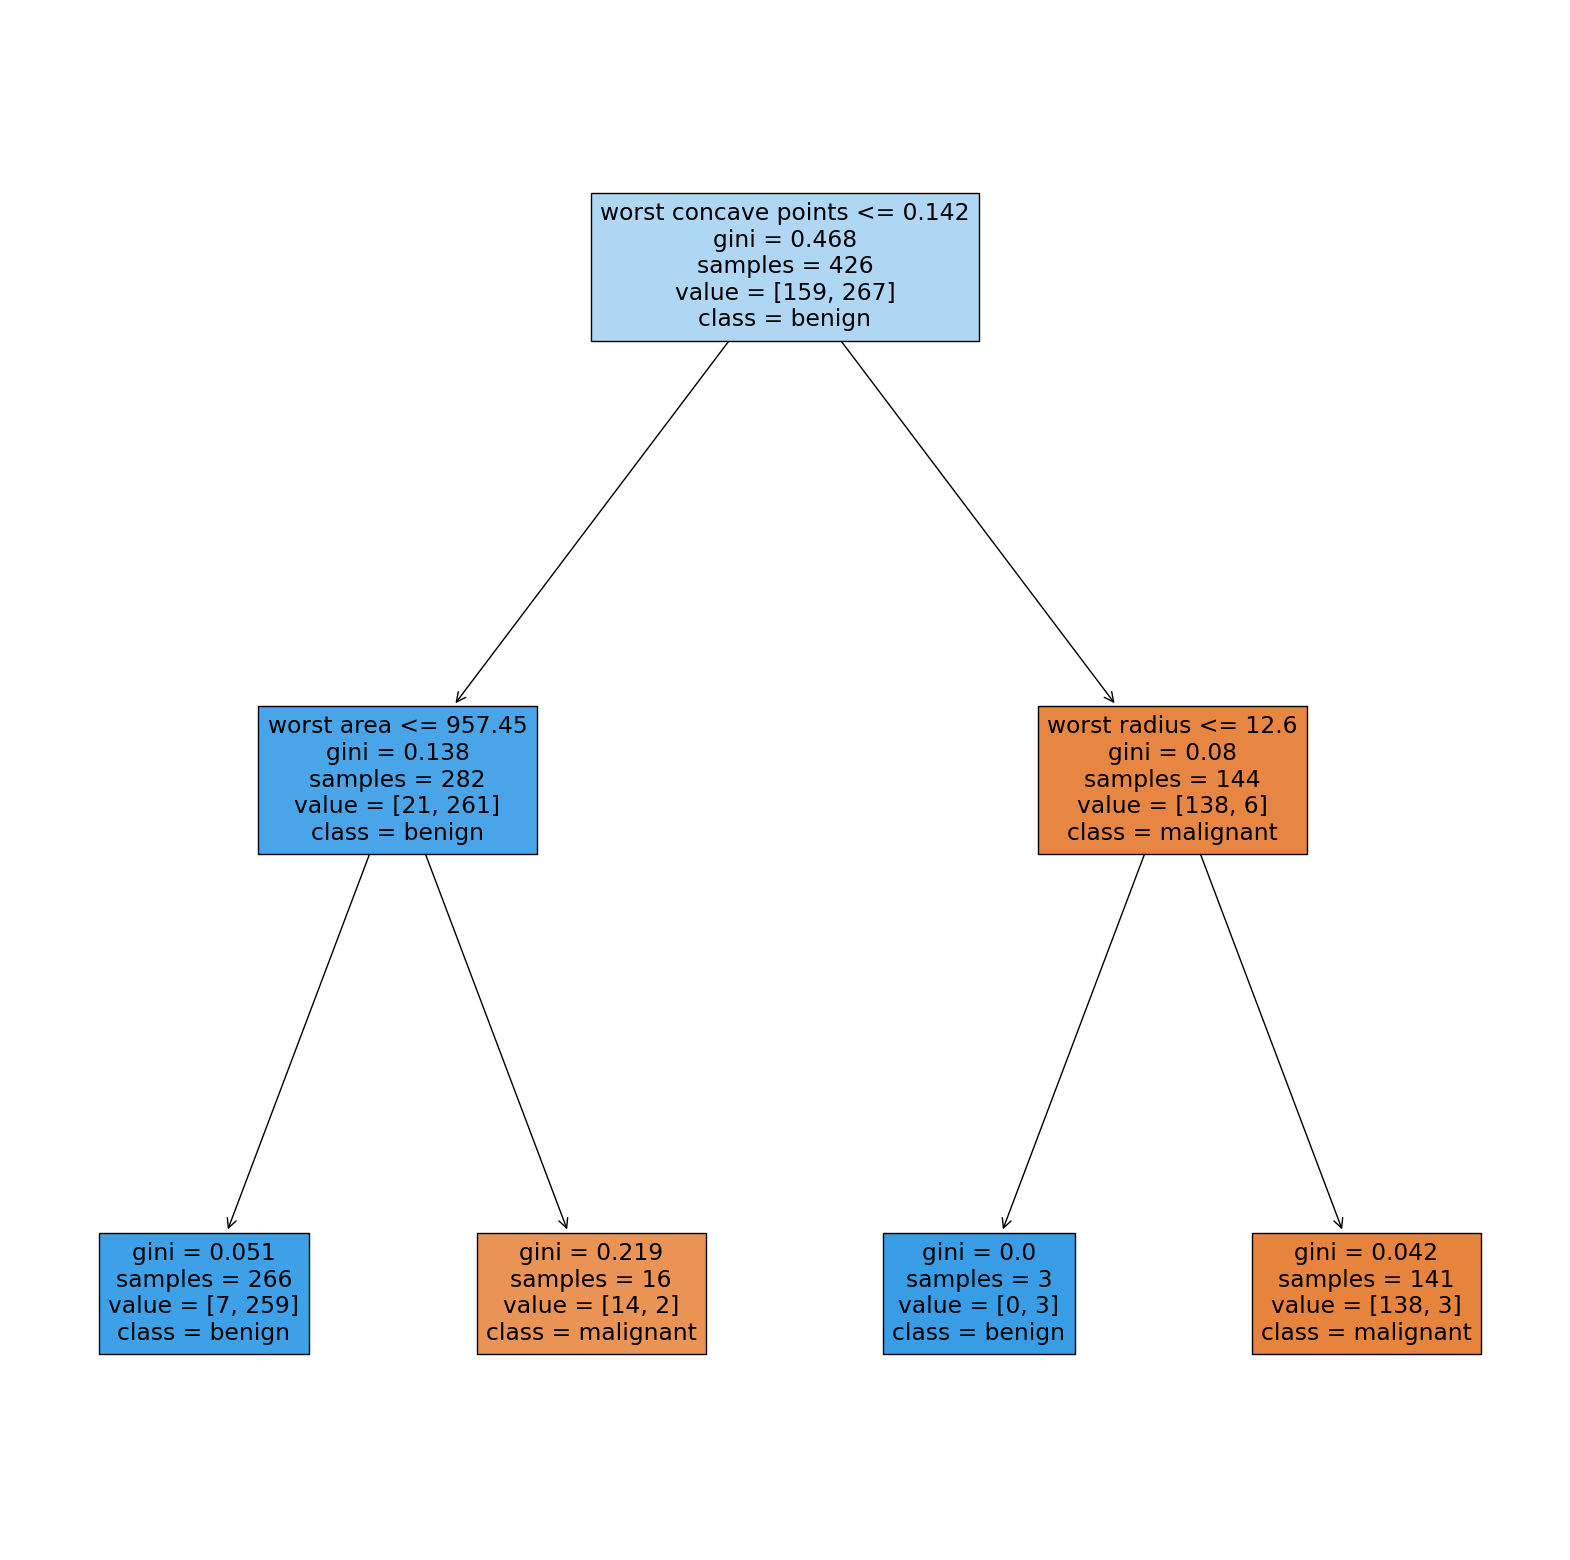

In [14]:
plt.figure(figsize=(20,20))
features = df.columns
classes = breast_cancer.target_names
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

# Pre pruning

In [21]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [8,10,12],
         'min_samples_split': [10,15,20],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 10, 12], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [10, 15, 20]})

Test score 0.8811188811188811


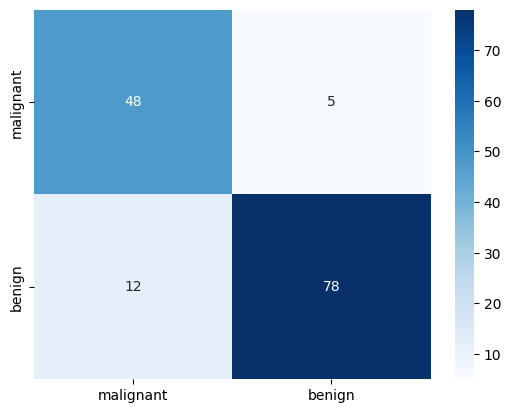

In [22]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Test score {accuracy_score(y_test_pred,y_test)}')

cm = confusion_matrix(y_test, y_test_pred, labels=[0,1])
sns.heatmap(cm,annot=True,yticklabels=classes, xticklabels=classes, cmap='Blues', fmt='g')
plt.show()

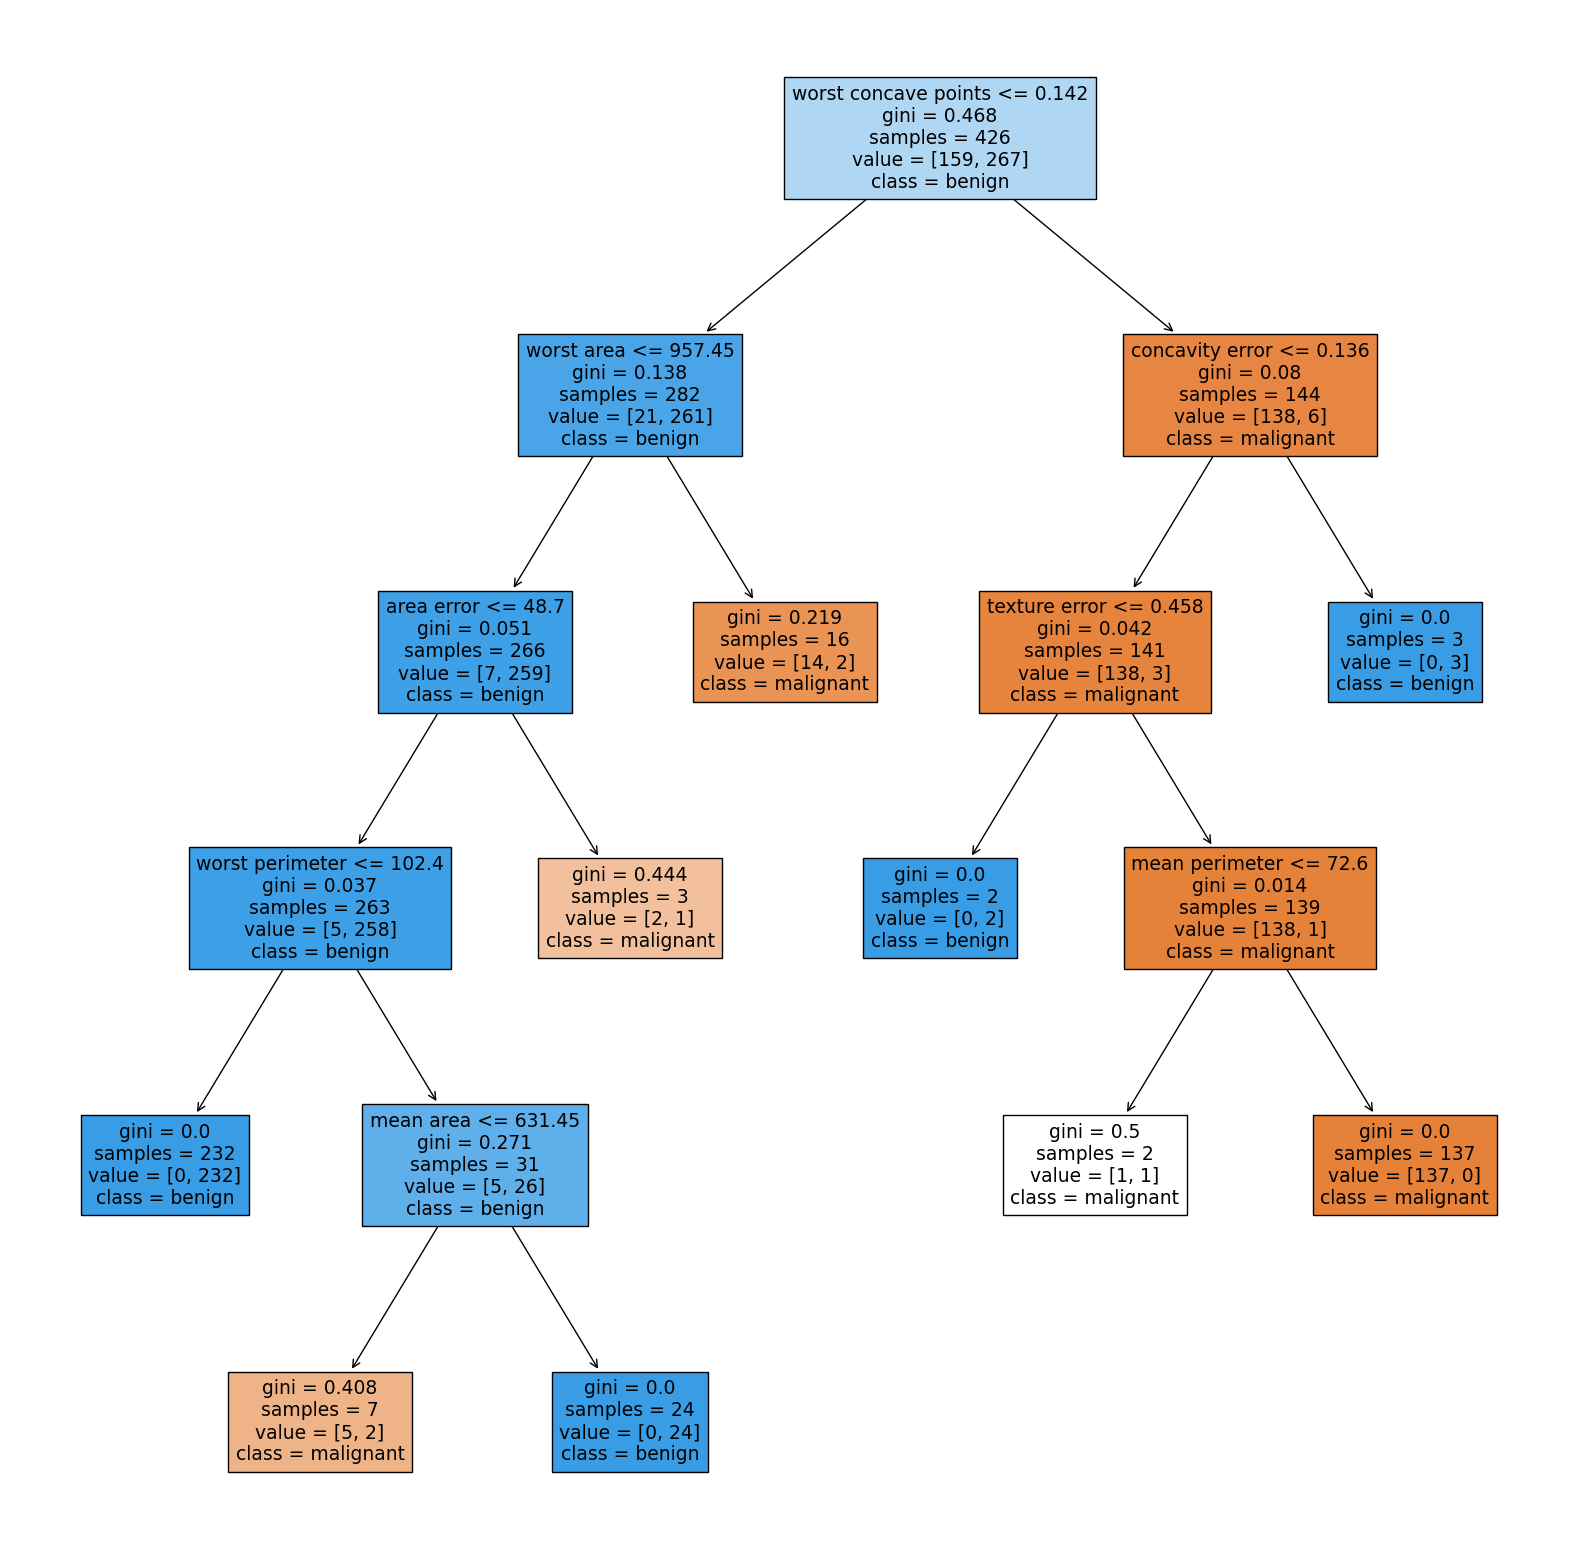

In [23]:
plt.figure(figsize=(20,20))
features = df.columns
classes = breast_cancer.target_names
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

#### Post pruning demo 

In [25]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)
print(impurities)

[0.         0.00231364 0.0073874  0.00912378 0.01321047 0.05103465
 0.34961859]
[0.02040018 0.02271382 0.04487603 0.05399981 0.06721028 0.11824493
 0.46786352]


In [26]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

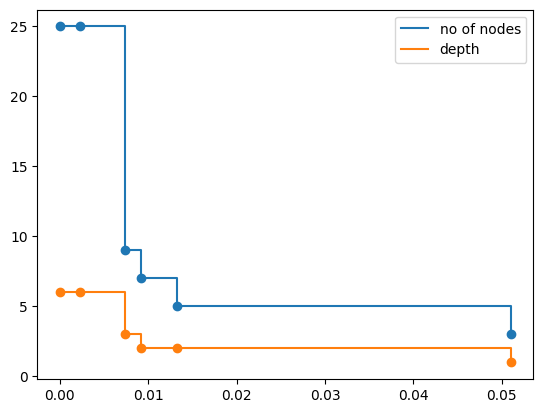

In [27]:
# We will remove the last element in clfs and ccp_alphas
# because it is the trivial tree with only one node

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

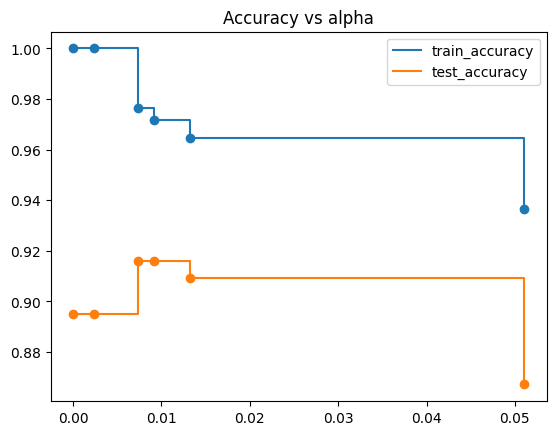

In [28]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

$$
\mathcal{L} = \sum_{i=1}^k G(S) + \alpha |T|
$$

Train score 0.9765258215962441
Test score 0.916083916083916


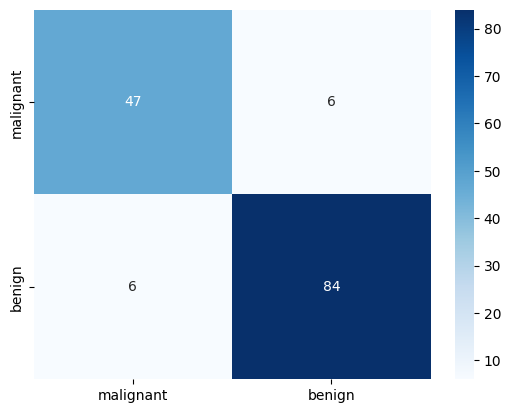

In [29]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.008)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

cm = confusion_matrix(y_test, y_test_pred, labels=[0,1])
sns.heatmap(cm,annot=True,yticklabels=classes, xticklabels=classes, cmap='Blues', fmt='g')
plt.show()

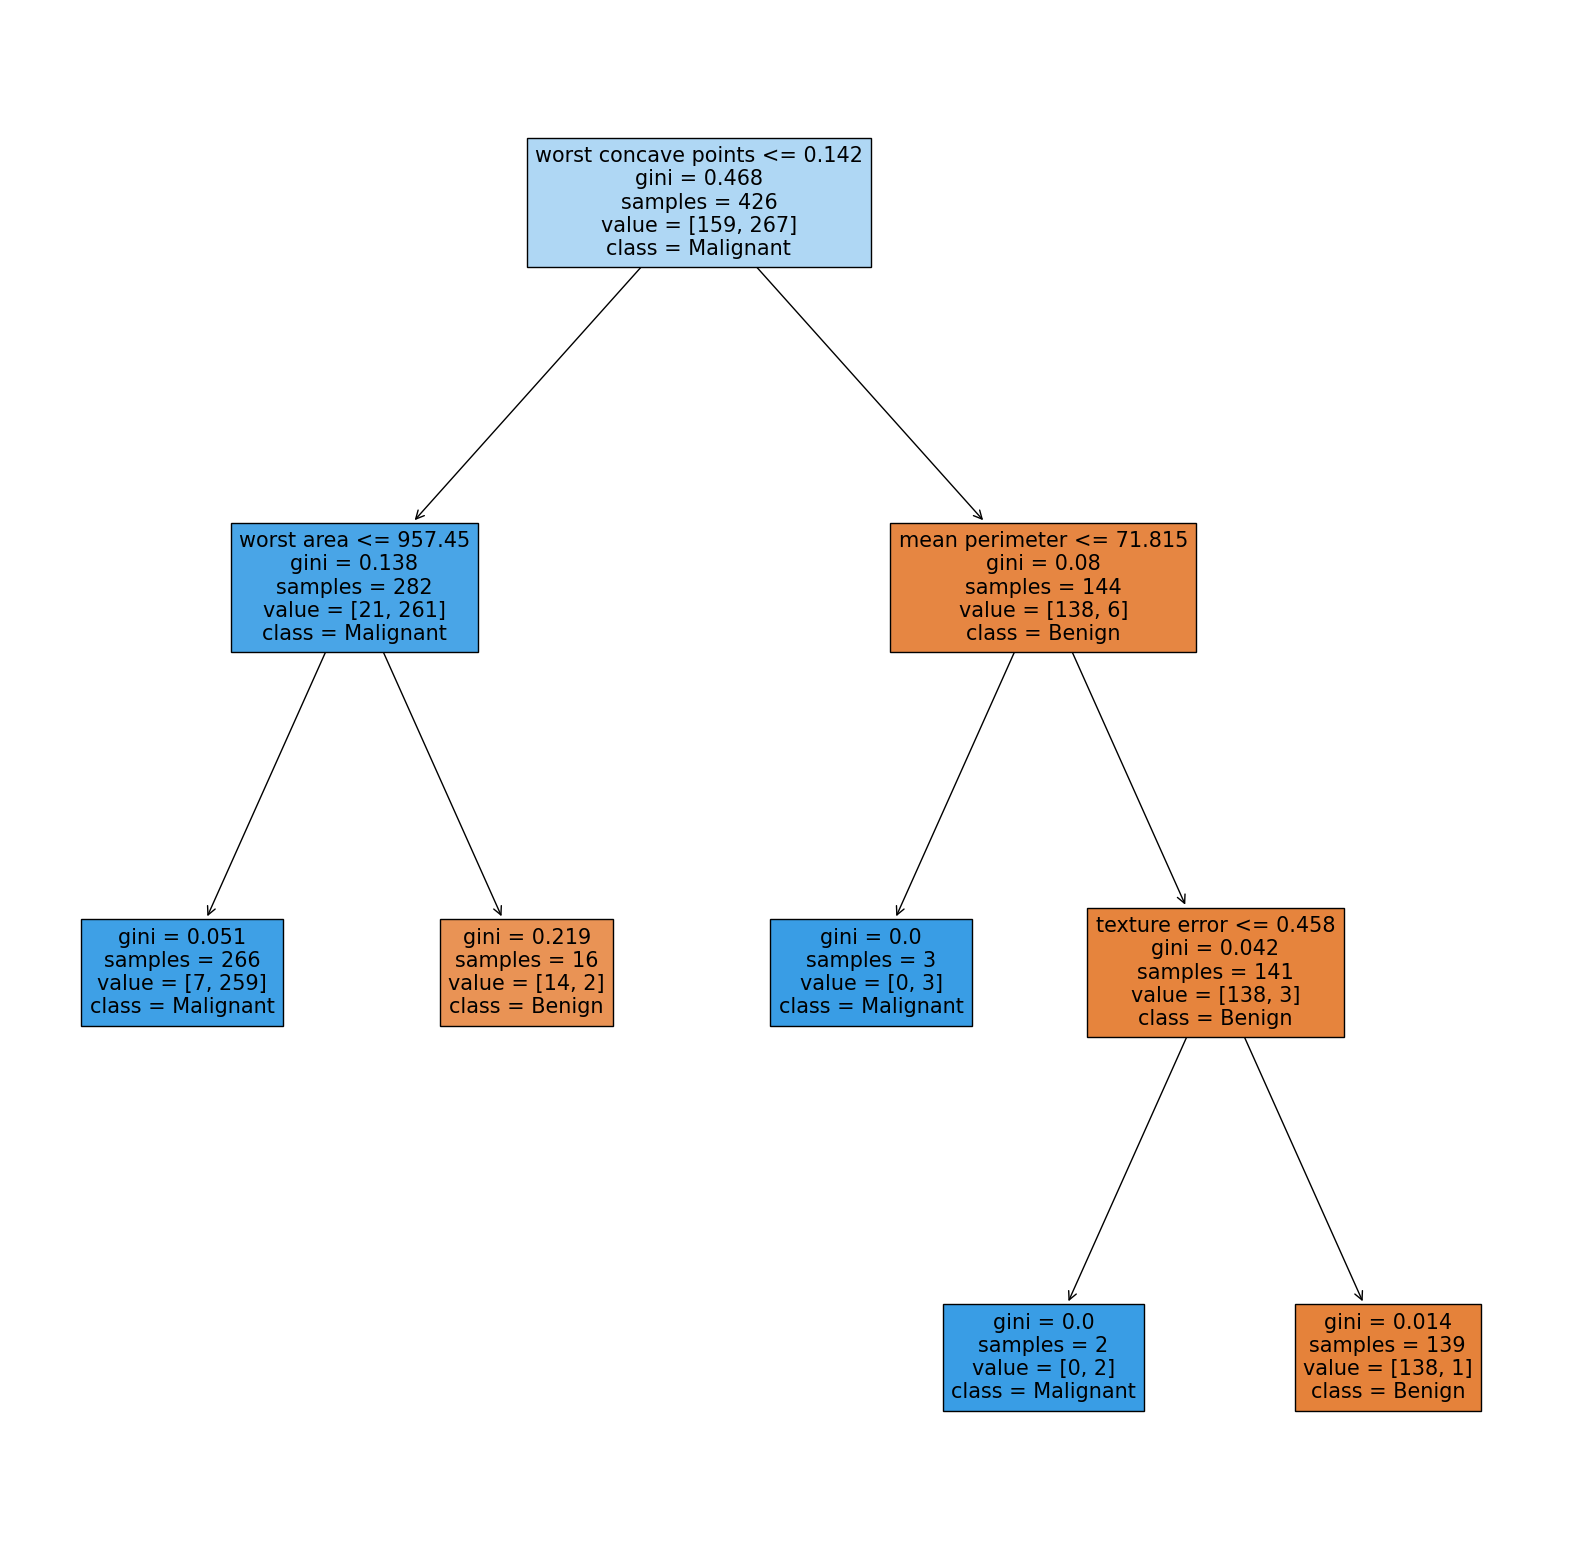

In [30]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Benign','Malignant']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

##### Next steps

https://www.kaggle.com/code/vbmokin/uci-heart-disease-data-dt-boosting-models


##### Gini impurity from scratch

In [10]:
import pandas as pd  
  
data ={
    'age' : ['youth', 'youth', 'middle_age', 'senior', 'senior', 'senior','middle_age', 'youth', 'youth', 'senior', 'youth', 'middle_age','middle_age', 'senior'],
    'income' : ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium','low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student' : ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
    'credit_rate' : ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair','excellent', 'excellent', 'fair', 'excellent'],
    'default' : ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes','yes', 'yes', 'yes', 'no']
}
  
# Create DataFrame  
df = pd.DataFrame(data)  
  
# Print the output.  
print(df)  

           age  income student credit_rate default
0        youth    high      no        fair      no
1        youth    high      no   excellent      no
2   middle_age    high      no        fair     yes
3       senior  medium      no        fair     yes
4       senior     low     yes        fair     yes
5       senior     low     yes   excellent      no
6   middle_age     low     yes   excellent     yes
7        youth  medium      no        fair      no
8        youth     low     yes        fair     yes
9       senior  medium     yes        fair     yes
10       youth  medium     yes   excellent     yes
11  middle_age  medium      no   excellent     yes
12  middle_age    high     yes        fair     yes
13      senior  medium      no   excellent      no


In [11]:
def gini_impurity(value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n ) 
    gini = 1 - p_sum
    return gini

In [12]:
class_value_counts = df['default'].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the class is {gini_class:.3f}')

Number of samples in each class is:
yes    9
no     5
Name: default, dtype: int64

Gini Impurity of the class is 0.459


In [13]:
# STEP 2: 
# Calculating  gini impurity for the attiributes
def gini_split_a(df, class_name, attribute_name):
    attribute_values = df[attribute_name].value_counts()
    gini_A = 0 
    for key in attribute_values.keys():
        df_k = df[class_name][df[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = df.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

In [14]:
col_names =  ['age', 'income','student', 'credit_rate']
gini_attiribute ={}
for key in col_names:
    gini_attiribute[key] = gini_split_a(df, 'default', key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')

Gini for age is 0.343
Gini for income is 0.440
Gini for student is 0.367
Gini for credit_rate is 0.429


In [15]:
# STEP 3: 
# Compute Gini gain values to find the best split
# An attribute has maximum Gini gain is selected for splitting.

min_value = min(gini_attiribute.values())
print('The minimum value of Gini Impurity : {0:.3} '.format(min_value))
print('The maximum value of Gini Gain     : {0:.3} '.format(1-min_value))

selected_attribute = min(gini_attiribute.keys())
print('The selected attiribute is: ', selected_attribute)

The minimum value of Gini Impurity : 0.343 
The maximum value of Gini Gain     : 0.657 
The selected attiribute is:  age
